In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats
import math

def plot_data_theory(datafile, x_col, y_col, theory_col, title='', x_label='', y_label='', x_unit='', y_unit='', x_error=0.0, y_error=0.0, theory_error=0.0):
    df = pd.read_excel('data/'+datafile+'.xlsx')

    x = df[x_col]
    y = df[y_col]
    theory = df[theory_col]

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    # Afficher la pente et l'incertitude associée
    print("Pente : ", slope)
    print("Incertitude : ", std_err)

    # Create figure and axes
    fig, ax = plt.subplots()

    a = slope

    # Calcul de l'incertitude sur la pente
    delta_slope = std_err * y_error / x_error
    ax.text(0.95, 0.05, f'a = {a:.2e} +- {delta_slope:.2e}', transform=ax.transAxes, ha='right')

    # Add data points to the plot
    ax.plot(x, y, 'o', label='Données expérimentales', ms=5, mec='cyan', mew=1)

    # Add theoretical data to the plot
    ax.plot(x, theory, '-', label='Théorique', lw=1, color='orange')

    # Add linear regression to the plot
    x_reg = np.linspace(x.min(), x.max(), 100)
    y_reg = slope * x_reg + intercept
    ax.plot(x_reg, y_reg, '--', label=f'Régression linéaire: f(x)=ax+b', lw=1, color='black')

    # Add axis labels and title
    ax.set_xlabel(x_label + ' (' + x_unit + ')')
    ax.set_ylabel(y_label + ' (' + y_unit + ')')
    ax.set_title(title)

    # Add legend
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Add error bars
    if x_error > 0:
        ax.errorbar(x, y, xerr=x_error, fmt='none', capsize=3, ecolor='cyan')
    if y_error > 0:
        ax.errorbar(x, y, yerr=y_error, fmt='none', capsize=3, ecolor='cyan')
    if theory_error > 0:
        ax.errorbar(x, theory, yerr=theory_error, fmt='none', capsize=2, ecolor='orange')

    # Add power of 10 scale to axes
    ax.yaxis.set_major_formatter('{x:.1e}')
    ax.xaxis.set_major_formatter('{x:.1e}')

    # Add R^2 value to the plot
    ax.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    plt.show()

    #Renvoie la valeur de a pour faire les caluls
    return a

Pente :  0.11285714285714288
Incertitude :  0.004562491263620239


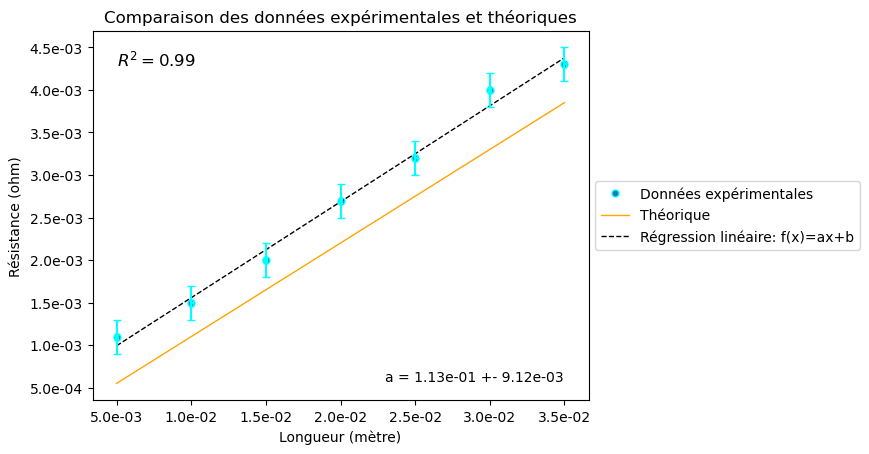

In [48]:
# appel de la fonction pour tracer le graphique pour 0.45 mm de section de cuivre
a45 = plot_data_theory('data045', 'Longueur', 'Resistance', 'Theorique',
                  title='Comparaison des données expérimentales et théoriques',
                  x_label='Longueur', y_label='Résistance',x_unit='mètre',y_unit='ohm',x_error=0.0001,y_error=0.0002)

Pente :  0.005553047404063205
Incertitude :  0.0006190207314131861


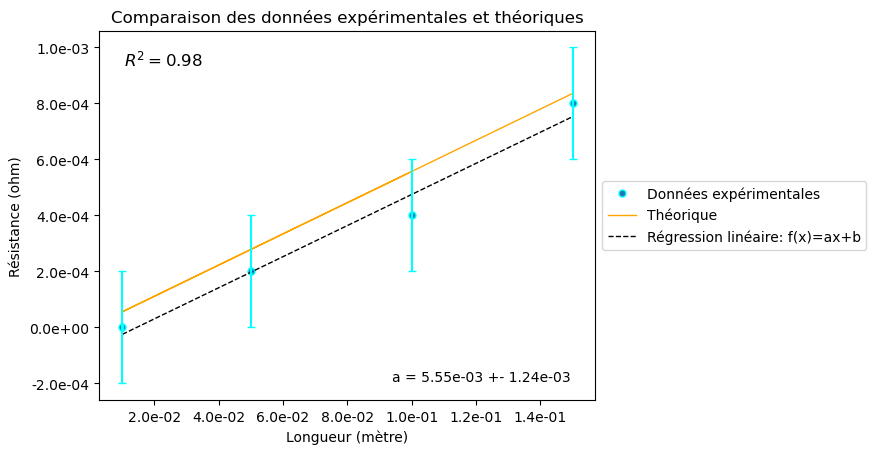

In [49]:
# appel de la fonction pour tracer le graphique pour 2 mm de section de cuivre
a2 = plot_data_theory('data2', 'Longueur', 'Resistance', 'Theorique',
                  title='Comparaison des données expérimentales et théoriques',
                  x_label='Longueur', y_label='Résistance',x_unit='mètre',y_unit='ohm',x_error=0.0001,y_error=0.0002)